# Python Assignment 3 - Part 2

## Lichun He - 111437571

Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_catvnoncat.h5 to train_catvnoncat.h5


In [2]:
import h5py
import numpy as np

def load_dataset(train_path):
    train_data = h5py.File(train_path, "r")

    X_train = np.array(train_data["train_set_x"][:])
    Y_train = np.array(train_data["train_set_y"][:])

    return X_train, Y_train

# Load train and test data
train_path = '/content/train_catvnoncat.h5'
X_train, Y_train, = load_dataset(train_path)

In [3]:
import torch

# Flatten and normalize
X_train = X_train.reshape(-1, 64 * 64 * 3) / 255.0

Y_train = torch.tensor(Y_train, dtype=torch.long)   # Convert labels to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)

In [4]:
# Define the training and test datasets based on the student's last digit (1 in this case)
train_size = 160
last_digit_of_id = 1
test_size = 209 - train_size - last_digit_of_id  # Remaining images for testing

# Split the data into the new training and test datasets
X_train_new = X_train[:train_size + last_digit_of_id]
Y_train_new = Y_train[:train_size + last_digit_of_id]
X_test_new = X_train[train_size + last_digit_of_id:]
Y_test_new = Y_train[train_size + last_digit_of_id:]

In [5]:
import torch.nn as nn
import torch.optim as optim

class FNN_Model(nn.Module):
    def __init__(self):
        super(FNN_Model, self).__init__()
        self.fc1 = nn.Linear(64 * 64 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 2)
        self.fc_hidden1 = nn.Linear(512, 256)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
from torch.utils.data import DataLoader, TensorDataset

model = FNN_Model()

criterion = nn.CrossEntropyLoss()  # Use Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_new, Y_train_new)
test_dataset = TensorDataset(X_test_new, Y_test_new)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Print training statistics
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

Epoch [1/20], Loss: 2.3145, Accuracy: 48.45%
Epoch [2/20], Loss: 1.3639, Accuracy: 40.99%
Epoch [3/20], Loss: 0.8838, Accuracy: 64.60%
Epoch [4/20], Loss: 0.7580, Accuracy: 54.04%
Epoch [5/20], Loss: 0.7024, Accuracy: 48.45%
Epoch [6/20], Loss: 0.6520, Accuracy: 64.60%
Epoch [7/20], Loss: 0.6763, Accuracy: 64.60%
Epoch [8/20], Loss: 0.6528, Accuracy: 64.60%
Epoch [9/20], Loss: 0.6712, Accuracy: 67.08%
Epoch [10/20], Loss: 0.6457, Accuracy: 64.60%
Epoch [11/20], Loss: 0.6549, Accuracy: 64.60%
Epoch [12/20], Loss: 0.6285, Accuracy: 65.22%
Epoch [13/20], Loss: 0.6177, Accuracy: 67.08%
Epoch [14/20], Loss: 0.5988, Accuracy: 64.60%
Epoch [15/20], Loss: 0.6229, Accuracy: 65.22%
Epoch [16/20], Loss: 0.6103, Accuracy: 68.32%
Epoch [17/20], Loss: 0.6090, Accuracy: 67.70%
Epoch [18/20], Loss: 0.5799, Accuracy: 68.32%
Epoch [19/20], Loss: 0.5741, Accuracy: 71.43%
Epoch [20/20], Loss: 0.5594, Accuracy: 69.57%


In [7]:
# Testing loop
model.eval()
correct = 0
total = 0

with torch.no_grad():  # No need to compute gradients for validation
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        correct_predictions = (predicted == Y_test_new)

test_acc = 100 * correct / total
print(f"Test Accuracy: {test_acc:.2f}%")

# Get indices where the model's predictions are incorrect
incorrect_indices = [i for i, correct in enumerate(correct_predictions) if not correct]

# Report the incorrect indices
print(f"Incorrect predictions at indices: {incorrect_indices}")

Test Accuracy: 54.17%
Incorrect predictions at indices: [1, 2, 3, 5, 6, 8, 9, 10, 14, 15, 16, 18, 22, 24, 27, 31, 32, 34, 36, 39, 41, 43]


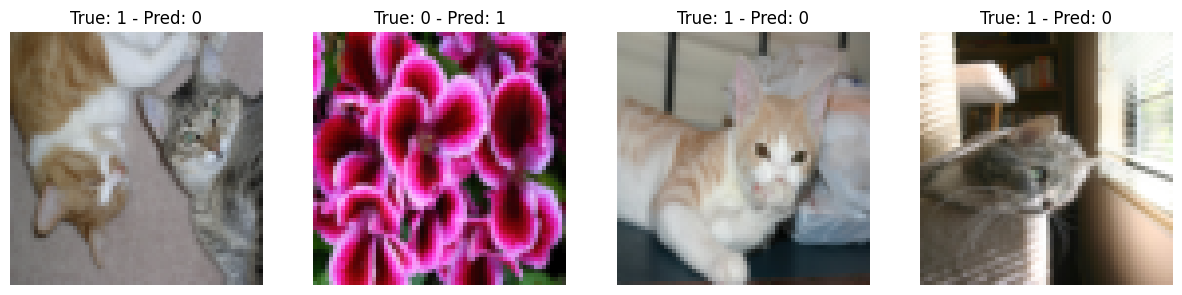

In [8]:
import matplotlib.pyplot as plt

# Display 4 random images from the incorrect cases
num_images_to_display = 4
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 15))

for i, ax in zip(range(num_images_to_display), axes):
    idx = incorrect_indices[i]
    image = X_test_new[idx].reshape(64, 64, 3).numpy()  # Reshape to the original image size
    ax.imshow(image)
    ax.set_title(f"True: {Y_test_new[idx].item()} - Pred: {predicted[idx].item()}")
    ax.axis('off')

plt.show()